# Facebook Friends Graph

In [138]:
import os
import re
from selenium import webdriver
from pattern import web
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sets import Set
import time
import pickle
import networkx as nx

In [76]:
chromeDriver = "/home/avinav/applications/chromedriver";
driver = webdriver.Chrome(chromeDriver);
driver.get("http://www.facebook.com");
file = open("/home/avinav/test/pass");
password = file.readline();
eEmail = driver.find_element_by_name("email");
ePass = driver.find_element_by_name("pass");
eEmail.send_keys("sharan.avinav@gmail.com");
ePass.send_keys(password);

In [126]:
df = pd.DataFrame(columns = ['name','link'])
adjlist = {}
url_dict = {}
i = 0
forest = set()
df.loc[i] = ["Avinav Sharan", "https://www.facebook.com/avinav.sharan"]
url_dict["https://www.facebook.com/avinav.sharan"] = i
df.head()

,name,link
0,Avinav Sharan,https://www.facebook.com/avinav.sharan


In [127]:
def get_children(df, adjlist, node_id, url_dict):
    driver.get(df.loc[node_id].link + "/friends")
    content = driver.page_source
    dom = web.Element(content)
    i = df.shape[0]
    e = np.array([],dtype='int')
    for friend in dom.by_class('fsl fwb fcb'):
        atag = friend.by_tag('a')[0]
        name = atag.content
        url = atag.attrs['href'].split('?')[0]
        if (url_dict.has_key(url)):
            e = np.append(e,url_dict[url])
        else:            
            df.loc[i] = [name, url]
            e = np.append(e,i)
            url_dict[url] = i
            i += 1
    adjlist[str(node_id)] = e

def create_graph(df, adjlist, depth, init_id, url_dict, forest):
    parent_url = df.loc[init_id].link
    if (depth > 0 and (parent_url not in forest)):
        forest.add(parent_url)
        get_children(df,adjlist, init_id, url_dict)
        for node_id in adjlist[str(init_id)]:
            time.sleep(120)
            create_graph(df, adjlist, depth - 1, node_id, url_dict, forest)

In [ ]:
create_graph(df, adjlist, 2, 0, url_dict, forest)

In [130]:
df.head()

,name,link
0,Avinav Sharan,https://www.facebook.com/avinav.sharan
1,Jagvir Singh,https://www.facebook.com/jagvir.singh.961
2,Aayush Uppal,https://www.facebook.com/aayushuppal
3,Deepak Sharma,https://www.facebook.com/deepak.jiitn
4,Mimanshu Shisodia,https://www.facebook.com/mimanshujain


In [133]:
data = {'adjlist':adjlist, 'url_dict':url_dict, 'forest': forest, 'df':df}

In [134]:
# pickle.dump(data,open('fbdata.p','wb'))
df.columns = ["_name", "link"]

In [231]:
graph = nx.Graph()
for name in df._name:
    graph.add_node(name.split()[0])

for node1,elist in adjlist.iteritems():
    for node2 in elist:
        graph.add_edge(df.loc[int(node1)]._name.split()[0],
                       df.loc[int(node2)]._name.split()[0])



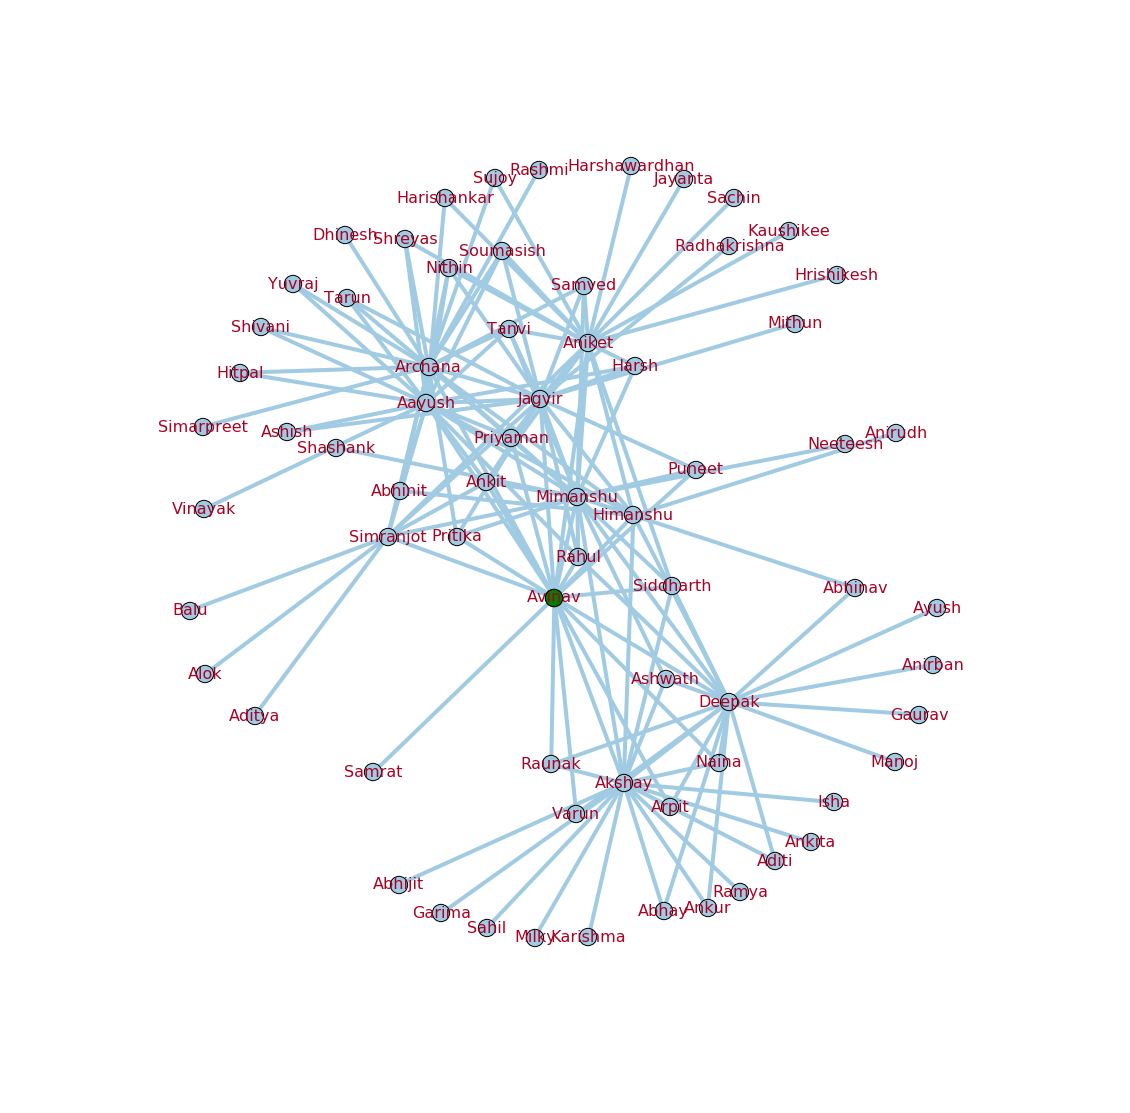

In [245]:
pos=nx.spring_layout(graph)
colors=range(graph.size())
plt.figure(figsize=(15,15))
nx.draw(graph,pos,node_color='#A0CBE2',edge_color="#A0CBE2",width=4)
nx.draw_networkx_nodes(graph,pos,nodelist=["Avinav"],node_size=300,node_color='g')
nx.draw_networkx_labels(graph,pos,font_size=16,font_color='#AA0022')
plt.savefig("friends_graph.png") # save as png
plt.show() # display